In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [3]:
with open('data_banknote_authentication.txt') as file:
    data = pd.read_csv(file, header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
diabetes_X, diabetes_y = data.iloc[:, 0:3], np.array(data.iloc[:, 4])

diabetes_X.head()
diabetes_X = np.array(diabetes_X)

In [5]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(diabetes_X)

scaled_df[:20]

array([[0.76900389, 0.83964273, 0.10678269],
       [0.83565902, 0.82098209, 0.12180412],
       [0.78662859, 0.41664827, 0.31060805],
       [0.75710505, 0.87169921, 0.05492063],
       [0.53157807, 0.34866247, 0.42466237],
       [0.82285875, 0.87727458, 0.05710039],
       [0.76681162, 0.62810808, 0.2591156 ],
       [0.65871247, 0.26054923, 0.59231482],
       [0.73883132, 0.73085573, 0.19525922],
       [0.61857373, 0.85876736, 0.12985116],
       [0.59615343, 0.84382612, 0.13236263],
       [0.79556354, 0.41409258, 0.33087212],
       [0.64480165, 0.80208945, 0.23434812],
       [0.39412558, 0.92109921, 0.3374028 ],
       [0.75331184, 0.84188784, 0.09884765],
       [0.84507713, 0.38853944, 0.37804295],
       [0.70051706, 0.63004262, 0.2437237 ],
       [0.56578255, 0.62191156, 0.41484481],
       [0.61224931, 0.33278952, 0.58711095],
       [0.88587932, 0.92799171, 0.04019644]])

In [6]:
# Split the data into training/testing sets
diabetes_X_train = scaled_df[:-100]
diabetes_X_test = scaled_df[-100:]
diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]

In [8]:
learning_rates = np.linspace(0.01, 0.9, 10)
alphas = np.linspace(0.01, 0.9, 10)
optimizers = ['lbfgs', 'sgd', 'adam']
results = {'lbfgs': [], 'sgd': [], 'adam': []}
for opt in optimizers:
    for lr in learning_rates:
        for alpha in alphas:
            mlp = MLPClassifier(alpha = alpha, learning_rate_init = lr, solver=opt)
            mlp.fit(diabetes_X_train, diabetes_y_train)
            score = mlp.score(diabetes_X_test, diabetes_y_test)
            results[opt].append({'learning_rate': lr, 'alpha': alpha, 'score': score})
results

C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-LtUHDCLA-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-LtUHDCLA-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-cou

{'lbfgs': [{'learning_rate': 0.01, 'alpha': 0.01, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.056842105263157895, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.10368421052631578, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.15052631578947367, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.19736842105263158, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.2442105263157895, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.29105263157894734, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.33789473684210525, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.38473684210526315, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.43157894736842106, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.47842105263157897, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.5252631578947369, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.5721052631578947, 'score': 1.0},
  {'learning_rate': 0.01, 'alpha': 0.6189473684210526, 'score': 1.0},
  {'learning_ra

lbfgs
     learning_rate     alpha  score
0         0.010000  0.010000    1.0
263       0.618947  0.150526    1.0
273       0.618947  0.618947    1.0
272       0.618947  0.572105    1.0
271       0.618947  0.525263    1.0
sgd
     learning_rate     alpha  score
200       0.478421  0.010000    1.0
121       0.291053  0.056842    1.0
266       0.618947  0.291053    1.0
263       0.618947  0.150526    1.0
262       0.618947  0.103684    1.0
adam
     learning_rate     alpha  score
0         0.010000  0.010000    1.0
121       0.291053  0.056842    1.0
123       0.291053  0.150526    1.0
124       0.291053  0.197368    1.0
132       0.291053  0.572105    1.0


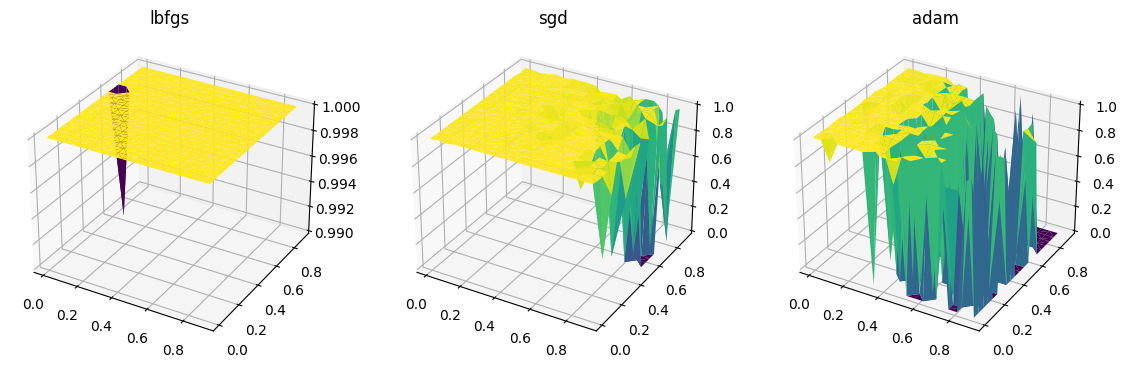

In [10]:
plt.figure(figsize=(14, 5))
for i, name in enumerate(optimizers):
    print(optimizers[i])
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.set_title(name)
    ds = pd.DataFrame(results[name])
    print(ds.sort_values('score', ascending=False).head())
    ax.plot_trisurf(ds['learning_rate'], ds['alpha'], ds['score'], cmap='viridis', edgecolor='none');
plt.show()

In [18]:
learning_rates = np.linspace(0.01, 1, 10)
alphas = np.linspace(0.01, 0.9, 20)
penalties = ['l2','l1','elasticnet']
results = {'l2': [], 'l1': [], 'elasticnet': []}
for pnlt in penalties:
    for lr in learning_rates:
        for alpha in alphas:
            mlp = Perceptron(alpha = alpha, l1_ratio = lr, penalty=pnlt)
            mlp.fit(diabetes_X_train, diabetes_y_train)
            score = mlp.score(diabetes_X_test, diabetes_y_test)
            results[pnlt].append({'l1_ratio': lr, 'alpha': alpha, 'score': score})
results

{'l2': [{'l1_ratio': 0.01, 'alpha': 0.01, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.056842105263157895, 'score': 0.84},
  {'l1_ratio': 0.01, 'alpha': 0.10368421052631578, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.15052631578947367, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.19736842105263158, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.2442105263157895, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.29105263157894734, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.33789473684210525, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.38473684210526315, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.43157894736842106, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.47842105263157897, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.5252631578947369, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.5721052631578947, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.6189473684210526, 'score': 1.0},
  {'l1_ratio': 0.01, 'alpha': 0.6657894736842105, 'score': 1.0},
  {'l1_ratio': 0.01, '

l2
     l1_ratio     alpha  score
0        0.01  0.010000    1.0
149      0.78  0.431579    1.0
126      0.67  0.291053    1.0
127      0.67  0.337895    1.0
128      0.67  0.384737    1.0
l1
     l1_ratio  alpha  score
0        0.01   0.01   0.99
20       0.12   0.01   0.99
180      1.00   0.01   0.99
160      0.89   0.01   0.99
140      0.78   0.01   0.99
elasticnet
    l1_ratio     alpha  score
0       0.01  0.010000    1.0
81      0.45  0.056842    1.0
40      0.23  0.010000    1.0
42      0.23  0.103684    1.0
43      0.23  0.150526    1.0


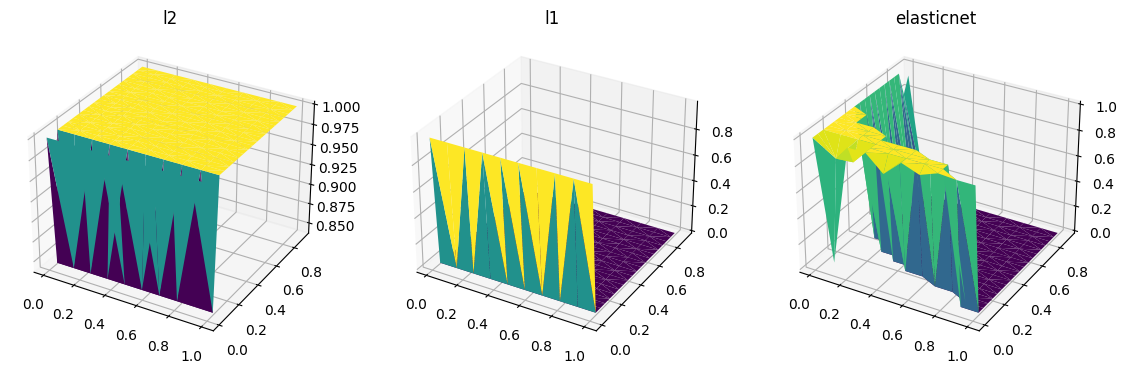

In [19]:
plt.figure(figsize=(14, 5))
for i, name in enumerate(penalties):
    print(penalties[i])
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.set_title(name)
    ds = pd.DataFrame(results[name])
    print(ds.sort_values('score', ascending=False).head())
    ax.plot_trisurf(ds['l1_ratio'], ds['alpha'], ds['score'], cmap='viridis', edgecolor='none');
plt.show()